# Wrangle.py Walkthrough
---

## First let's import our libraries including env which has a function for getting a database url already made previously

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from env import get_url

## Next let's get our url and write up our query

In [2]:
url = get_url('telco_churn')

query = '''
SELECT customer_id, monthly_charges, tenure, total_charges
FROM customers
JOIN contract_types USING (contract_type_id)
WHERE contract_type = 'Two year'
'''

## Now let's go get our data

In [3]:
df = pd.read_sql(query, url)
df

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75
...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.4
1691,9972-EWRJS,19.25,67,1372.9
1692,9975-GPKZU,19.75,46,856.5
1693,9993-LHIEB,67.85,67,4627.65


## We'll use a descibe() and info() to get a look under the hood.

In [4]:
df.describe()

,monthly_charges,tenure
count,1695.000000,1695.000000
mean,60.770413,56.735103
std,34.678865,18.209363
min,18.400000,0.000000
25%,24.025000,48.000000
50%,64.350000,64.000000
75%,90.450000,71.000000
max,118.750000,72.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
monthly_charges    1695 non-null float64
tenure             1695 non-null int64
total_charges      1695 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


## Looks like total charges is an object so lets see what is going on there

In [6]:
df.total_charges.value_counts(dropna=False)

           10
1161.75     2
1110.05     2
343.45      2
5714.2      2
           ..
1188.2      1
637.55      1
638.55      1
2345.55     1
6697.2      1
Name: total_charges, Length: 1678, dtype: int64

## So there are some blankspaces in the data that we need to get rid of, so let's change them to nulls

In [7]:
df.replace(' ', np.nan, inplace=True)

## Let's validate that that fixed the issue

In [8]:
df.total_charges.value_counts(dropna=False)

NaN        10
343.45      2
1161.75     2
3533.6      2
5682.25     2
           ..
1188.2      1
637.55      1
638.55      1
2345.55     1
1363.45     1
Name: total_charges, Length: 1678, dtype: int64

## Now since there is only 10, let's just get rid of those rows.

In [9]:
df = df.dropna()

## With those spaces out of the way, we should have no problem changing total_charges into float type

In [10]:
df.total_charges = df.total_charges.astype('float')

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## And lets validate that all is fixed

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1685 non-null object
monthly_charges    1685 non-null float64
tenure             1685 non-null int64
total_charges      1685 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 65.8+ KB


## Great, now just a quick viz of our distributions in the data

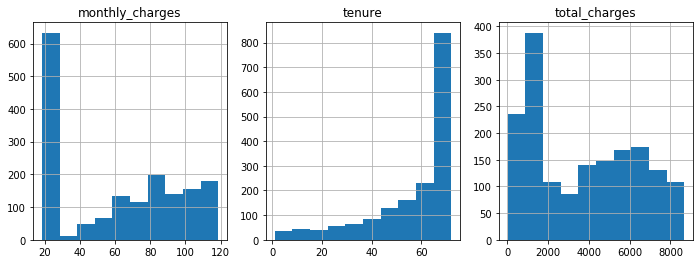

In [12]:
plt.figure(figsize=(16, 4))

for i, col in enumerate(['monthly_charges', 'tenure', 'total_charges']):
    plot_number = i + 1
    series = df[col]
    plt.subplot(1, 4, plot_number)
    plt.title(col)
    series.hist()